##  Line of Best Fit Examples
The following aims to demonstrate how we can determine a line of best fit.

We start with a simple relationship:
$$ y = f(x; A, B) = A + Bx $$
This is the equation of the straigt line, which intercepts the y-axis at $A$ and has a slope/gradient of $B$.

We use this relationship to generate some data by applying the function and adding some noise ($\epsilon$), i.e.
$$y = A + Bx + \epsilon $$ 

In the cell below complete the function f to return the value of y.

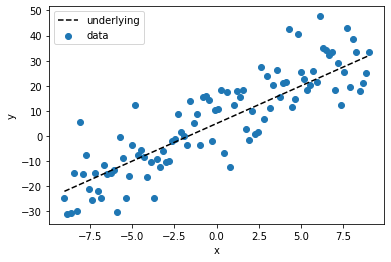

In [6]:
import numpy as np
import matplotlib.pyplot as plt

'''
    Real Function to evaluate y = f(x; A, B) = A + Bx
'''
def f(x, A, B):
    #y=0
    y = A + B*x
    
    return y
'''
    The below prints the values
'''

# Real values for equations.
A_true=5
B_true=3

# amount of noise to add
error_sigma = 10

# number of data points
N = 100
# range of x values to use.
x_start = -9
x_stop = 9

# setup xs and ys and a noise parameter
noise = np.random.normal(0,error_sigma,N)
xs = np.linspace(x_start,x_stop,N)
ys = f(xs,A_true,B_true) + noise

# plot x,y with best fit
plt.scatter(xs,ys, label="data")
plt.plot(xs,f(xs,A_true,B_true), color="black", linestyle="--", label="underlying")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Defining Error
A new line can be plotted through the data using any value of $A$ and $B$ to calculate a set of predicted y values ($y_{pred}$)

How well this line fits the data can be determined calculating an error between the data ($y_{real}$) and $y_{pred}$ as $x$ is the same, i.e.
$$error =  y_{real}  - y_{pred}$$

The sum of the errors is then a measure of goodness of fit.

The error however can be both positive and negative, which can cause problems, e.g. if we had values with a large differnces above and below the line they would cancel out and make the sum error small.

To avoid this we square the error before summing:

$$SSE = \sum{(y_{real}  - y_{pred})^2}$$

Where SSE stands for sum of square error.
Sometimes we use the Mean Square Error ($MSE$) as:
$$MSE = \sqrt{\sum{(y_{real}  - y_{pred})^2}}$$

In the cell below complete the function to calculate $SSE$.

In [7]:
'''
    Square Error function
'''
def sum_square_error(y_pred, y_real):
    SSE=(np.sum(np.sqrt(np.power(y_pred - y_real,2))))
    return SSE

One approach to determine the minimal value of $SSE$ is to systematically try all possible combinations of $A$ and $B$. This is known as a grid search. 

Grid searches are useful as they graphically show the pattern of how variables are related, however they require lots of calculations.

The cell below is setup to display a contour plot of a grid search..

Three arrays are required to be populated, the start as:
$As$ and $Bs$ are 1 x M arrays i.e. if M = 5
$$As=[\begin{array}{}
0 & 0 & 0 & 0 & 0
\end{array}] $$
$$Bs=[\begin{array}{}
0 & 0 & 0 & 0 & 0
\end{array}]$$

The final array $SSEs$ is then M x M:

$$
SSEs = \left[
\begin{array}{}
0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 0 & 0
\end{array}
\right]
$$

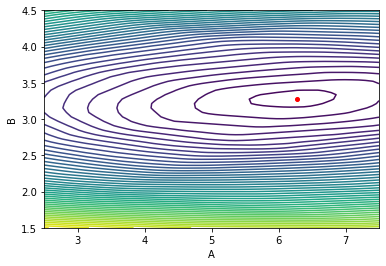

A = [6.2755102], B = [3.2755102]


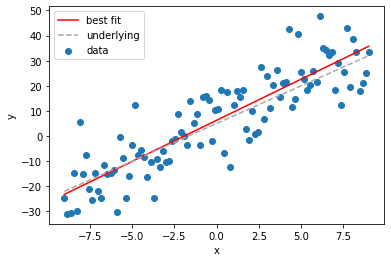

In [8]:
# Create a grid
## number of values to test for each parameter
M=50
## ranges to test over
As = np.linspace(A_true*0.5, A_true*1.5 , M)
Bs = np.linspace(B_true*0.5, B_true*1.5 , M)

## empty array of the correct size for SSE values
SSEs = np.empty((M,M))

''' 
    Write code here to iterate over As and Bs and calculate SSE to fill in the SSEs array.
    You may find the zip function helpful.
'''
for i in range(M): # As
    for j in range(M): #Bs
        ys_pred = f(xs, As[i] , Bs[j])      
        err = sum_square_error(ys_pred, ys)
        SSEs[j,i]=err

'''
    code below will display contours from grid
'''        
# find minima from grid search
i, j = np.where(SSEs==np.min(SSEs))
A_min=As[j]
B_min=Bs[i]
 
# plot grid
ax = plt.gca()     
ax.contour(As,Bs,SSEs,levels=50)
ax.plot(A_min,B_min, color="red", marker = "o", zorder = 10, markersize=4, clip_on=False)
plt.xlabel("A")
plt.ylabel("B")
plt.show()

# plot x,y with best fit
print("A = {}, B = {}".format(A_min,B_min))
plt.scatter(xs,ys, label="data")
plt.plot(xs,f(xs,A_min,B_min), color="red", label="best fit")
plt.plot(xs,f(xs,A_true,B_true), color="darkgrey", linestyle="--", label="underlying")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Miminised Parameters A = 6.318043747918849, B = 3.2960658596651524
Iterations until stable 63


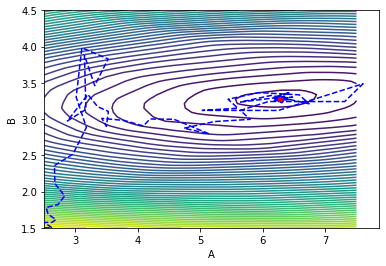

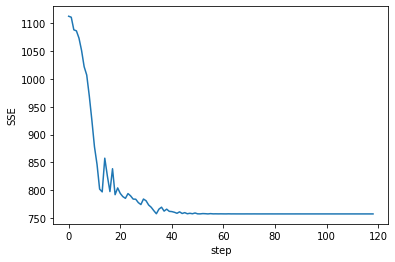

In [9]:
from scipy.optimize import minimize

# initial guess
A_1 = np.min(As)
B_1 = np.min(Bs)

# lists for capturing the params and SSE from each "step" (iteration)
param_steps=[]
SSE_steps=[]

'''
    Function to calculate get SSE by applying the function using A and B
'''
def apply_and_calc_SSE(params):
    # setup A and B from the array
    A = params[0]
    B = params[1]
    # calculate error (SSE)
    err= sum_square_error(ys,f(xs,A,B))
    # update lists
    param_steps.append(params)
    SSE_steps.append(err)
    return err

# Perform optimisation using minimse.
res = minimize(apply_and_calc_SSE, (A_1, B_1), method="Nelder-Mead")
print("Miminised Parameters A = {}, B = {}".format(res.x[0],res.x[1]))
print("Iterations until stable {}".format(res.nit))

param_steps=np.stack(np.array(param_steps))
ax = plt.gca()     
ax.contour(As,Bs,SSEs,levels=50)
ax.plot(param_steps[:,0],param_steps[:,1],color="blue",linestyle="--",zorder = 10)
ax.plot(A_min,B_min, color="red", marker = "o", zorder = 10, markersize=4, clip_on=False)
plt.xlabel("A")
plt.ylabel("B")
plt.show()

plt.plot(range(len(SSE_steps)),SSE_steps)
plt.xlabel("step")
plt.ylabel("SSE")
plt.show()


## Exact Solution
For "simple" linear cases, an exact solution can be found. This proof\[1\] requires calculus, as derivitives are required to find minimia - so this proof is above KS4 maths.

The result however is simple to calculate albeit arduous to apply by hand!

For all values of x and y calculate the mean ($\bar{x}, \bar{y}$) values via:
$$\bar{x}=\frac{\sum{x}}{n}, \bar{y}=\frac{\sum{y}}{n}$$

Then calculate the difference ($\Delta{x}, \Delta{y}$) between each point at the mean as
$$ \Delta{x} = (x - \bar{x}), \Delta{y} = (y - \bar{y})$$


The value of $\hat{B}$ can then be found as:
$$ \hat{B} = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sum{(x - \bar{x})^2}}=\frac{\sum{\Delta{x}\Delta{y}}}{\sum{\Delta{x}^2}}=\frac{s_{xy}}{s^2_x}$$

and this can then be used to find $\hat{A}$ as:
$$\hat{A} = \bar{y} - \hat{B}\bar{x}$$

Note: we use $\hat{A}$ & $\hat{B}$ rather than $A$ & $B$ as they are estimates of the underlying values given the data.

As you can see by rerunning the above cells, the minimsed values of $A$ & $B$ will change based on the random noise introduced, even if the true values set at the top remain the same.

Write some code int he cell below to calculate $\hat{A}$ and $\hat{B}$

Reference:
1. https://statproofbook.github.io/P/slr-ols.html


A = 6.056858479002005, B = 3.2013190343550604


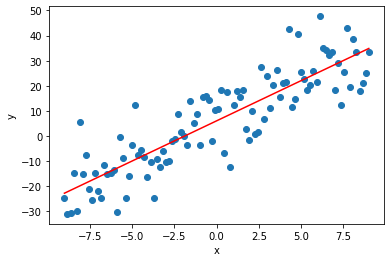

In [10]:
x_mean = np.mean(xs)
y_mean = np.mean(ys)
delta_x = xs-x_mean
delta_y = ys-y_mean

SXY = np.sum(delta_x * delta_y)
SXX = np.sum(delta_x * delta_x)
B = SXY/SXX
A = y_mean  - B *x_mean 


'''
Plot graph of values - expect A and B to be calculated above.
'''
print("A = {}, B = {}".format(A,B))
# plot x,y with best fit
plt.scatter(xs,ys)
plt.plot(xs,f(xs,A,B), color="red")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


This process is known and Ordinary Least Squares (OLS), there are numerous libraries that apply this, the below code uses statsmodels, check the values of A and B vs you're calculation. 

The OLS library also provides "goodness of fit" metrics such as R-Squared, the closer this is to 1 the better the fit.

In [11]:
import statsmodels.api as sm 
X = xs
X = sm.add_constant(X)
result = sm.OLS(ys,X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     307.5
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           5.55e-32
Time:                        23:53:47   Log-Likelihood:                -366.87
No. Observations:                 100   AIC:                             737.7
Df Residuals:                      98   BIC:                             743.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0569      0.958      6.321      0.0